In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

import random
import numpy as np
import pandas as pd

import scipy.stats as stats


In [2]:
def read_file(file):
    return  pd.read_csv(file, parse_dates=['created_date'])

In [3]:
def get_cycle_times(df):
    cleaned = df[df['created_date'] > '2017-12-31']
    cleaned = cleaned[cleaned['cycle_time_days'] > -1]


    project_0_cycle_times = cleaned[cleaned['grp'] == 0].cycle_time_days
    project_1_cycle_times = cleaned[cleaned['grp'] == 1].cycle_time_days

    return project_0_cycle_times.values

In [4]:

def plot_cycle_time_hist(cycle_times, name='Project'):

    fig, ax = plt.subplots(figsize=(10, 5))
    fig.suptitle('Histogram Cycle Times (Days)', fontsize=14, fontweight='bold')
    plt.hist(cycle_times, label=name)
    ax.set_xlabel('Cycle Times')
    ax.set_ylabel('Frequency')
    plt.legend(loc='upper right')
    plt.show()

In [5]:
def plot_cycle_times_boxplot(cycle_times, name='Project'):
    fig, ax = plt.subplots(figsize=(10, 5))
    fig.suptitle('Boxplot Cycle Times (Day)', fontsize=14, fontweight='bold')

    plt.boxplot(cycle_times)

    ax.set_xticklabels(name)
    ax.set_ylabel('Cycle Times')


    plt.show()

In [6]:
def print_summary_stats(cycle_times):
   
    print('Number of observations:', stats.describe(cycle_times).nobs)
    print('Coefficient of variation:', stats.variation(cycle_times))

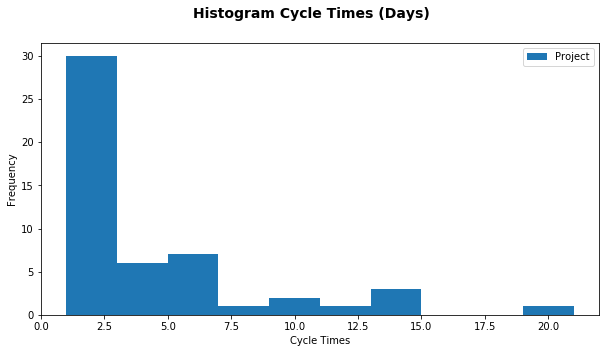

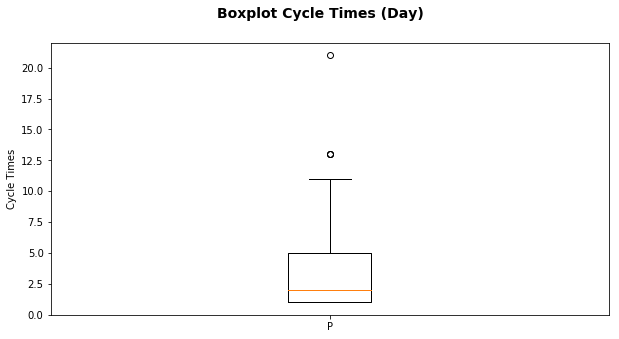

Number of observations: 51
Coefficient of variation: 1.131409450013304


In [7]:
df = read_file('data.csv')
cycle_times = get_cycle_times(df)
plot_cycle_time_hist(cycle_times)
plot_cycle_times_boxplot(cycle_times)
print_summary_stats(cycle_times)

In [18]:
print(stats.describe(cycle_times))

DescribeResult(nobs=51, minmax=(1, 21), mean=3.7058823529411766, variance=17.93176470588235, skewness=2.0789642149745884, kurtosis=4.474217402617895)


In [19]:
print(stats.variation(cycle_times))

1.131409450013304


In [20]:
def simulate(max_work_items, cycle_times, selector, itearions):
    out = []
    
    for i in range(itearions):
        out.append(run_iteration(max_work_items, cycle_times, selector))
        
    return np.transpose(out)

def run_iteration(max_work_items, cycle_times, selector):
    total = [0]
    for i, e in enumerate(range(max_work_items)):
            total.append(selector(cycle_times))
    return total 

def cumulative_sum_row_wise(a):
    return np.cumsum(a, 0)



In [21]:
max_work_items = 10
iterations = 100

In [22]:
range_work_items = np.array([x for x in range(max_work_items + 1)])
range_work_items

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [24]:
s = simulate(max_work_items, cycle_times, np.random.choice, iterations)
s

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 3,  1,  1, ...,  1,  1,  5],
       [11,  7, 11, ...,  2,  2,  1],
       ...,
       [ 1,  2,  1, ...,  9, 13,  5],
       [ 2,  5,  1, ...,  1,  1,  9],
       [ 7,  1,  1, ..., 13,  1,  6]])

In [25]:
c = cumulative_sum_row_wise(s)
c

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 3,  1,  1, ...,  1,  1,  5],
       [14,  8, 12, ...,  3,  3,  6],
       ...,
       [21, 43, 53, ..., 35, 27, 60],
       [23, 48, 54, ..., 36, 28, 69],
       [30, 49, 55, ..., 49, 29, 75]])

In [27]:
v_max = cumulative_sum_row_wise([max(cycle_times) for i in range(max_work_items)])
v_max = np.insert(v_max, 0, 0)
v_max

array([  0,  21,  42,  63,  84, 105, 126, 147, 168, 189, 210])

In [29]:
v_min = cumulative_sum_row_wise([min(cycle_times) for i in range(max_work_items)])
v_min = np.insert(v_min, 0, 0)
v_min

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

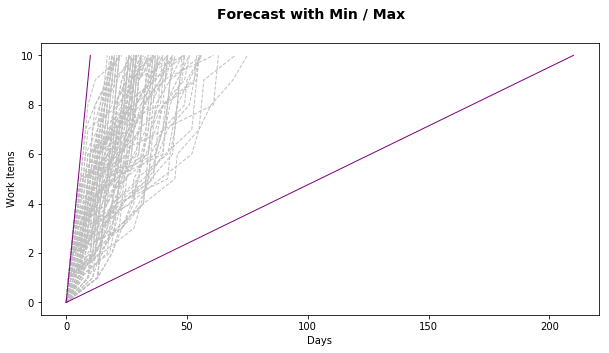

In [30]:
fig, ax = plt.subplots(figsize=(10, 5))


fig.suptitle('Forecast with Min / Max', fontsize=14, fontweight='bold')

plt.plot(c, range_work_items, color='silver', linestyle='dashed', linewidth=1)
plt.plot(v_max, range_work_items, color='purple', linestyle='solid', linewidth=1)
plt.plot(v_min, range_work_items, color='purple', linestyle='solid', linewidth=1)


ax.set_xlabel("Days")
ax.set_ylabel("Work Items")


plt.show()


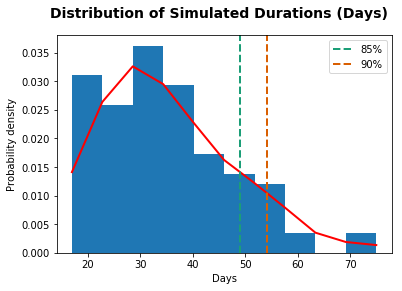

In [31]:

fig, ax = plt.subplots()

fig.suptitle('Distribution of Simulated Durations (Days)', fontsize=14, fontweight='bold')

n, x, _ = plt.hist(c[-1], normed=True)

density = stats.gaussian_kde(c[-1])
plt.plot(x, density(x), color="red", linewidth=2)

ax.set_xlabel('Days')
ax.set_ylabel('Probability density')

p = [85, 90]
q = np.percentile(c[-1], p)

cm = plt.cm.get_cmap('Dark2')

for i, v in enumerate(q):
    plt.axvline(v, color=cm.colors[i], linestyle='dashed', linewidth=2, label=str(p[i]) + '%')

plt.legend(loc='upper right')
plt.show()

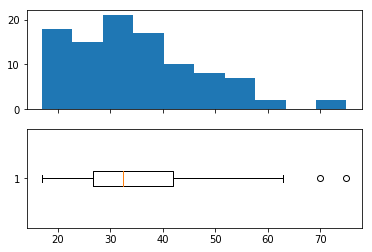

In [32]:

f, (ax1, ax2) = plt.subplots(2, sharex=True)
ax1.hist(c[-1])

ax2.boxplot(c[-1], vert=False)
plt.show()

In [33]:
p85 = []
day = 10
for i in range(len(c)):
    p85.append(stats.percentileofscore(c[i], day))

In [34]:
p85

[100.0, 92.0, 76.0, 57.99999999999999, 37.0, 21.0, 8.5, 3.0, 1.0, 0.0, 0.0]

In [35]:
stats.scoreatpercentile(c[2], 85)

12.0

In [36]:
c[2]

array([14,  8, 12, 14,  6,  2,  2,  2,  2,  5,  3,  5, 11, 17,  5, 14,  2,
        4,  7,  2,  5,  6,  3,  3,  9,  4, 14,  6,  2,  3,  3,  2,  2,  7,
        7, 12,  8,  4,  6, 15,  5,  3,  8,  7,  3, 11,  4,  2, 14,  2,  2,
        5, 19,  6,  2, 12, 10,  7, 10, 12, 18,  2, 12,  2,  4,  2,  2,  6,
        2,  2,  7,  5,  6,  2,  2, 14,  6,  3,  3, 12,  7, 12,  3, 11, 10,
        3,  3,  2,  4,  2,  2,  5, 19,  2, 14,  2, 15,  3,  3,  6])

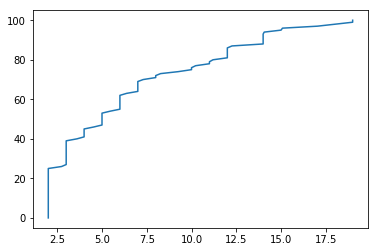

In [37]:
plt.plot(stats.scoreatpercentile(c[2], range(101)), range(101))
plt.show()

In [38]:
stats.scoreatpercentile(c[2], 50)

5.0